In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [3]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

## 1. Explore Data

### Review dataset

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Insights:

Null values to be filled
- Age, Cabin, Embarked

Datatypes to be casted
- Age: float -> int

In [5]:
# Check for statistical values
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Pivoting features:
- Look for meaningful features that may affect the survival of a passenger

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [8]:
# Try for the survival rate per sex
train[['Sex', 'Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [9]:
train[['Age', 'Survived']].groupby(['Age'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Age,Survived
0,0.42,1.0
9,5.00,1.0
79,63.00,1.0
68,53.00,1.0
1,0.67,1.0
...,...,...
37,28.50,0.0
49,36.50,0.0
46,34.50,0.0
26,20.50,0.0


In [10]:
# Try for survival rate per Sibsp
train[['SibSp', 'Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [11]:
# Try for survival rate per Sibsp
train[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


In [12]:
train[['Fare', 'Survived']].groupby(['Fare'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


**Hypothesis for numerical & continuous variables**:
- PClass, Sex becomes important factors in predicting the survival of a passenger
- SibSp: not sure but to be kept
- Age, Parch, Fare to be explored more (continuous variable)

### Visualization
- Use graphs to visualize Age, Parch, Sibsp and Fare feature's importance

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

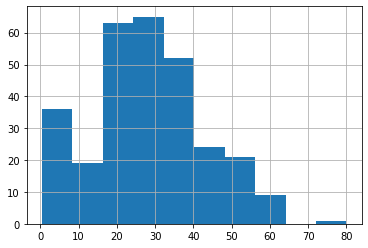

In [14]:
# add a histogram of only age distribution
train[train['Survived'] == 1]['Age'].hist()

<AxesSubplot:>

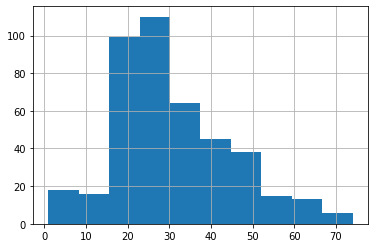

In [15]:
train[train['Survived'] == 0]['Age'].hist()

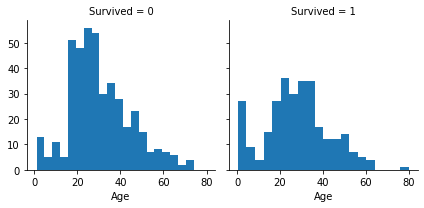

In [16]:
grph = sns.FacetGrid(train, col = "Survived")
grph.map(plt.hist, 'Age', bins = 20)

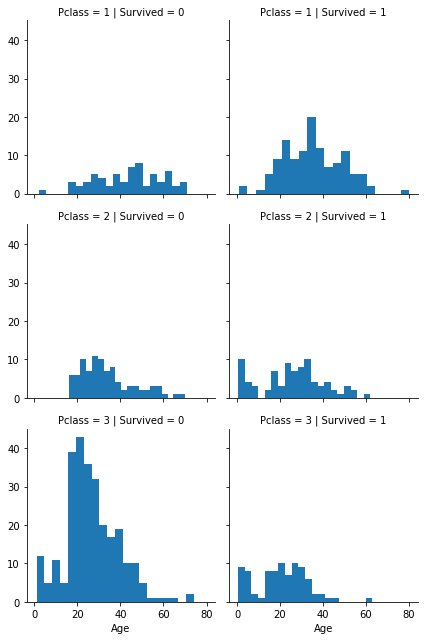

In [17]:
grph = sns.FacetGrid(train, col = "Survived", row = 'Pclass')
grph.map(plt.hist, 'Age', bins = 20)

**Insights for Age column:**
- Age column to be added to modelling
- Age 0 ~ 15 has the highest survival rate

In [18]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


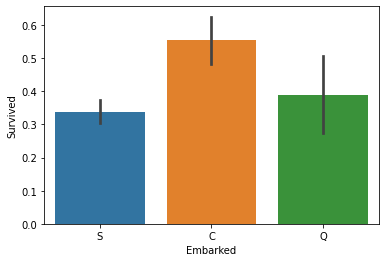

In [19]:
# investigate for Embarked column
ax = sns.barplot(x = train['Embarked'], y = train['Survived'])

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:643: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


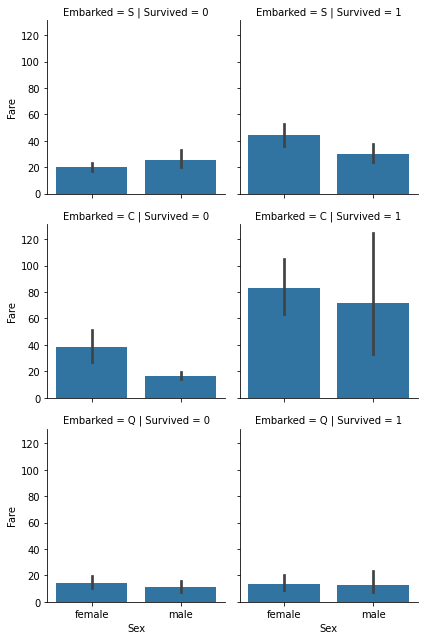

In [20]:
# investiage Embarked column and Fare column
grph = sns.FacetGrid(train, row = 'Embarked', col = 'Survived')
grph.map(sns.barplot, 'Sex', 'Fare')

**Insights on 'Fare' and 'Embarked**:
- Higher fare paying passenger has a higher survival rate
- Embarked Q has the highest survival rate


### Final Hypothesis:

**Numerical Variable**
- Age: Younger passengers had the highest survival rate
- PClass: Passengers on higher class had the highest survival rate
- SibSp: to be kept

**Continuous Variable**
- Fare: Passengers paying higher fare has a higher survival rate
- Sex: Women survived more than men
- Embarked: Embarked on Q port had the highest survival rate

## 2. Data Process
- Feature engineering
- Fill Null values in an **efficient way**
- For both the train and test data
- Purpose: Maximizing accuracy for modelling

In [21]:
train = pd.read_csv('/kaggle/input/titanic/train.csv')
test = pd.read_csv('/kaggle/input/titanic/test.csv')
gender_submission = pd.read_csv('/kaggle/input/titanic/gender_submission.csv')

### 1. Drop unnecessary features

In [22]:
# Start by dropping unnecessary features
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [24]:
print('train shape:', train.shape, 'test shape:', test.shape)

train shape: (891, 12) test shape: (418, 11)


In [25]:
train = train.drop(['Ticket', 'Cabin'], axis = 1)
test = test.drop(['Ticket', 'Cabin'], axis = 1)

In [26]:
print('train shape:', train.shape, 'test shape:', test.shape)

train shape: (891, 10) test shape: (418, 9)


In [27]:
combined = [train, test]

### 2. Encode categorical data
- Encoding: Converting categorical data into ordial values
- This is because machine learning models cannot interpret string values!
- `Name`, `Sex`, `Embarked`

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
for dataset in combined:
    dataset['Sex'] = dataset['Sex'].astype(str)
    label = LabelEncoder()

    dataset['Sex'] = label.fit_transform(dataset['Sex'])

In [30]:
combined[1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,9.6875,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",1,NaN,0,0,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",0,39.0,0,0,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",1,38.5,0,0,7.2500,S
416,1308,3,"Ware, Mr. Frederick",1,NaN,0,0,8.0500,S


`Age` encoded successsfully\
Male: 1, Female: 0

In [31]:
# Band Name column by the status
for dataset in combined:
    dataset['Title'] = dataset.Name.str.extract('([A-Za-z]+)\.')
    dataset['Title'] = dataset['Title'].replace(['Capt', 'Col', 'Major', 'Dr', 'Rev'], 'Officer')
    dataset['Title'] = dataset['Title'].replace(['Jonkheer', 'Master'], 'Master')
    dataset['Title'] = dataset['Title'].replace(['Don', 'Sir', 'the Countess', 'Lady', 'Dona'], 'Royalty')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Ms', 'Mrs'], 'Mrs')
    dataset['Title'] = dataset['Title'].replace(['Mlle', 'Miss'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mr'], 'Mr')

In [32]:
combined[0]['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Royalty', 'Officer', 'Countess'],
      dtype=object)

In [33]:
combined[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S,Officer
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C,Mr


In [34]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royalty": 5, 'Officer': 6, 'Countess': 7}

for dataset in combined:
    dataset['Title'] = dataset['Title'].map(title_mapping)

combined[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,1


In [35]:
# check for null value
combined[0].isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
Title            0
dtype: int64

### 3. Numercial continuous columns
- Filling null values
- Banding
- `Age`, `Fare`

<AxesSubplot:>

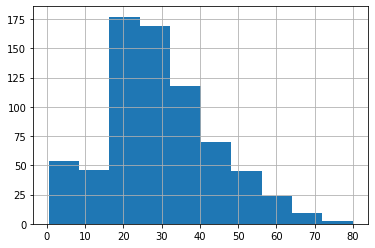

In [36]:
# Check the distribution of age
combined[0]['Age'].hist()

In [37]:
# Assume the null values for the age of passengers using other features

combined[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,8.0500,S,1
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.0,0,0,13.0000,S,6
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.0,0,0,30.0000,S,2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,NaN,1,2,23.4500,S,2
889,890,1,1,"Behr, Mr. Karl Howell",1,26.0,0,0,30.0000,C,1


/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


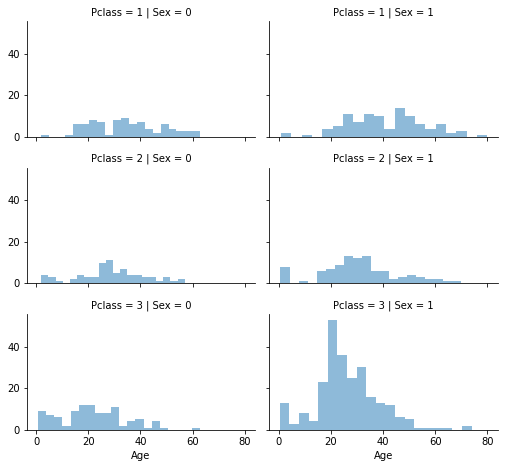

In [38]:
grid = sns.FacetGrid(combined[0], row='Pclass', col='Sex', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

Insight:

- Higher class -> Higher age
- In overall, more men younger than women

- Smaller Pclass -> Bigger Age
- If Sex == 1 -> Less Age

In [39]:
guess_ages = np.zeros((2,3))
guess_ages
# Column: Sex, Row: PClass

array([[0., 0., 0.],
       [0., 0., 0.]])

In [40]:
# Data of 'Sex' equal to 1 and Pclass equal to 1
combined[0][(combined[0]['Sex'] == 1) & \
                                  (combined[0]['Pclass'] == 1)]['Age']

6      54.0
23     28.0
27     19.0
30     40.0
34     28.0
       ... 
839     NaN
857    51.0
867    31.0
872    33.0
889    26.0
Name: Age, Length: 122, dtype: float64

In [41]:
for dataset in combined:
    # For each sex
    for i in range(0, 2):
        # For each PClass
        for j in range(0, 3):
            # Calculate median value of the age of certain condition in Sex and PClass
            guess_df = dataset[(dataset['Sex'] == i) & \
                                  (dataset['Pclass'] == j+1)]['Age'].dropna()

            age_guess = guess_df.median()

            # Convert random age float to nearest .5 age
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5

In [42]:
# Row: Sex
# Column: Pclass
guess_ages

for i in range(0, 2):
    for j in range(0, 3):
        print('Sex:', i, 'Pclass', j + 1, guess_ages[i][j])

Sex: 0 Pclass 1 41.0
Sex: 0 Pclass 2 24.0
Sex: 0 Pclass 3 22.0
Sex: 1 Pclass 1 42.0
Sex: 1 Pclass 2 28.0
Sex: 1 Pclass 3 24.0


In [43]:
for dataset in combined:
    # Fill in null values  
    for i in range(0, 2):
        for j in range(0, 3):
            # 1. Locate null rows
            # 2. Where Sex == i and Pclass == j + 1
            # 3. Fill in the row with guess_ages[i][j]
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j + 1), \
                       'Age'] = guess_ages[i, j]
    
    dataset['Age'] = dataset['Age'].astype(int)
    

combined[0].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",1,22,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",1,35,0,0,8.0500,S,1


In [44]:
combined[1].isna().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64

<AxesSubplot:>

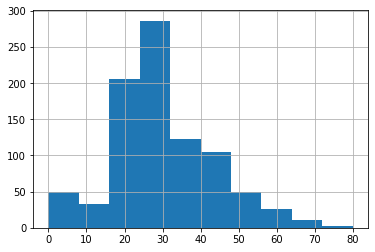

In [45]:
combined[0]['Age'].hist()

In [46]:
# Check age band's correlation with survival

for dataset in combined:
    dataset['AgeBand'] = pd.cut(dataset['Age'], 5)
    
combined[0][['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [47]:
sample = [24, 7, 2, 25, 22, 29]

#Bins size has equal interval of 9
pd.cut(sample, 3).value_counts()

(1.973, 11.0]    2
(11.0, 20.0]     0
(20.0, 29.0]     4
dtype: int64

In [48]:
pd.qcut(sample,3).value_counts()

(1.999, 17.0]     2
(17.0, 24.333]    2
(24.333, 29.0]    2
dtype: int64

In [49]:
for dataset in combined:    
    dataset.loc[dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[dataset['Age'] > 64, 'Age'] = 4

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,1,0,3,"Braund, Mr. Owen Harris",1,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,3,1,3,"Heikkinen, Miss. Laina",0,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,5,0,3,"Allen, Mr. William Henry",1,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [50]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,892,3,"Kelly, Mr. James",1,2,0,0,7.8292,Q,1,"(30.4, 45.6]"
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,2,1,0,7.0000,S,3,"(45.6, 60.8]"
2,894,2,"Myles, Mr. Thomas Francis",1,3,0,0,9.6875,Q,1,"(60.8, 76.0]"
3,895,3,"Wirz, Mr. Albert",1,1,0,0,8.6625,S,1,"(15.2, 30.4]"
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,1,1,1,12.2875,S,3,"(15.2, 30.4]"


In [51]:
# drop Ageband column
combined[0] = combined[0].drop(['AgeBand'], axis=1)
combined[1] = combined[1].drop(['AgeBand'], axis=1)

In [52]:
# drop Name column 
combined[0] = combined[0].drop(['Name'], axis=1)
combined[1] = combined[1].drop(['Name'], axis=1)

In [53]:
combined[0] = combined[0].drop(['PassengerId'], axis=1)

In [54]:
# Try banding 'Fare' column!
combined[0]['FareBand'] = pd.qcut(combined[0]['Fare'], 4)
combined[0][['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [55]:
combined[1]['Fare'] = combined[1]['Fare'].fillna(0)

In [56]:
combined[1].isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Title          0
dtype: int64

In [57]:
combined[1]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,2,0,0,7.8292,Q,1
1,893,3,0,2,1,0,7.0000,S,3
2,894,2,1,3,0,0,9.6875,Q,1
3,895,3,1,1,0,0,8.6625,S,1
4,896,3,0,1,1,1,12.2875,S,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,0,0,8.0500,S,1
414,1306,1,0,2,0,0,108.9000,C,5
415,1307,3,1,2,0,0,7.2500,S,1
416,1308,3,1,1,0,0,8.0500,S,1


In [58]:
for dataset in combined:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

combined[0] = combined[0].drop(['FareBand'], axis=1)
    
combined[0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,0,S,1
1,1,1,0,2,1,0,3,C,3
2,1,3,0,1,0,0,1,S,2
3,1,1,0,2,1,0,3,S,3
4,0,3,1,2,0,0,1,S,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,1,S,6
887,1,1,0,1,0,0,2,S,2
888,0,3,0,1,1,2,2,S,2
889,1,1,1,1,0,0,2,C,1


In [59]:
combined[0].Fare.unique()

array([0, 3, 1, 2])

In [60]:
combined[1].Fare.unique()

array([0, 1, 2, 3])

In [61]:
for dataset in combined:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')
    dataset['Embarked'] = label.fit_transform(dataset['Embarked'])

In [62]:
combined[0].Embarked.isnull().sum()

0

In [63]:
combined[0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,0,2,1
1,1,1,0,2,1,0,3,0,3
2,1,3,0,1,0,0,1,2,2
3,1,1,0,2,1,0,3,2,3
4,0,3,1,2,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,1,2,6
887,1,1,0,1,0,0,2,2,2
888,0,3,0,1,1,2,2,2,2
889,1,1,1,1,0,0,2,0,1


In [64]:
combined[0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,1,1,1,0,0,2,1
1,1,1,0,2,1,0,3,0,3
2,1,3,0,1,0,0,1,2,2
3,1,1,0,2,1,0,3,2,3
4,0,3,1,2,0,0,1,2,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,0,1,2,6
887,1,1,0,1,0,0,2,2,2
888,0,3,0,1,1,2,2,2,2
889,1,1,1,1,0,0,2,0,1


In [65]:
combined[1]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,1,2,0,0,0,1,1
1,893,3,0,2,1,0,0,2,3
2,894,2,1,3,0,0,1,1,1
3,895,3,1,1,0,0,1,2,1
4,896,3,0,1,1,1,1,2,3
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,0,0,1,2,1
414,1306,1,0,2,0,0,3,0,5
415,1307,3,1,2,0,0,0,2,1
416,1308,3,1,1,0,0,1,2,1


In [66]:
combined[0].SibSp.unique()

array([1, 0, 3, 4, 2, 5, 8])

In [67]:
for dataset in combined:
    dataset['Alone'] = 0
    dataset.loc[dataset['SibSp'] == 0, 'Alone'] = 1
    dataset.loc[dataset['SibSp'] != 0, 'Alone'] = 0
    
combined[0].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Alone
0,0,3,1,1,1,0,0,2,1,0
1,1,1,0,2,1,0,3,0,3,0
2,1,3,0,1,0,0,1,2,2,1
3,1,1,0,2,1,0,3,2,3,0
4,0,3,1,2,0,0,1,2,1,1


In [68]:
combined[0].Alone.value_counts()

1    608
0    283
Name: Alone, dtype: int64

In [69]:
combined[1]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Alone
0,892,3,1,2,0,0,0,1,1,1
1,893,3,0,2,1,0,0,2,3,0
2,894,2,1,3,0,0,1,1,1,1
3,895,3,1,1,0,0,1,2,1,1
4,896,3,0,1,1,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,0,0,1,2,1,1
414,1306,1,0,2,0,0,3,0,5,1
415,1307,3,1,2,0,0,0,2,1,1
416,1308,3,1,1,0,0,1,2,1,1


In [70]:
combined[0] = combined[0].drop(['SibSp'], axis=1)
combined[1] = combined[1].drop(['SibSp'], axis=1)

In [71]:
combined[0]

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Title,Alone
0,0,3,1,1,0,0,2,1,0
1,1,1,0,2,0,3,0,3,0
2,1,3,0,1,0,1,2,2,1
3,1,1,0,2,0,3,2,3,0
4,0,3,1,2,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,1,2,6,1
887,1,1,0,1,0,2,2,2,1
888,0,3,0,1,2,2,2,2,0
889,1,1,1,1,0,2,0,1,1


In [72]:
train_proc = combined[0]
test_proc = combined[1]

In [73]:
train_proc

,Survived,Pclass,Sex,Age,Parch,Fare,Embarked,Title,Alone
0,0,3,1,1,0,0,2,1,0
1,1,1,0,2,0,3,0,3,0
2,1,3,0,1,0,1,2,2,1
3,1,1,0,2,0,3,2,3,0
4,0,3,1,2,0,1,2,1,1
...,...,...,...,...,...,...,...,...,...
886,0,2,1,1,0,1,2,6,1
887,1,1,0,1,0,2,2,2,1
888,0,3,0,1,2,2,2,2,0
889,1,1,1,1,0,2,0,1,1


In [74]:
test_proc

,PassengerId,Pclass,Sex,Age,Parch,Fare,Embarked,Title,Alone
0,892,3,1,2,0,0,1,1,1
1,893,3,0,2,0,0,2,3,0
2,894,2,1,3,0,1,1,1,1
3,895,3,1,1,0,1,2,1,1
4,896,3,0,1,1,1,2,3,0
...,...,...,...,...,...,...,...,...,...
413,1305,3,1,1,0,1,2,1,1
414,1306,1,0,2,0,3,0,5,1
415,1307,3,1,2,0,0,2,1,1
416,1308,3,1,1,0,1,2,1,1


## 3. Data Modelling
- Logistic Regression

In [75]:
# Split features and labels
X_train = train_proc.drop("Survived", axis=1)
Y_train = train_proc["Survived"]

X_test  = test_proc.drop("PassengerId", axis=1).copy()

X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

In [76]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


In [77]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

80.7

In [78]:
coeff_df = pd.DataFrame(train_proc.columns.delete(0))
coeff_df.columns = ['Feature']
coeff_df["Correlation"] = pd.Series(logreg.coef_[0])

coeff_df.sort_values(by='Correlation', ascending=False)

,Feature,Correlation
6,Title,0.371343
7,Alone,0.253069
4,Fare,0.055206
5,Embarked,-0.257641
3,Parch,-0.267809
2,Age,-0.594366
0,Pclass,-1.106770
1,Sex,-2.312900


**Insight:**
- Bigger absolute value means higher correlation
- Positive coefficient: 
- Negative coefficient: 

In [79]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

88.33

In [80]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [81]:
importances.head(15)

,importance
feature,
Title,0.258
Sex,0.197
Pclass,0.159
Fare,0.112
Age,0.096
Parch,0.071
Embarked,0.064
Alone,0.042


## 4. Submission

In [82]:
gender_submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [83]:
submission = pd.DataFrame({
        "PassengerId": test_proc["PassengerId"],
        "Survived": Y_pred
    })

submission
#submission.to_csv('../output/submission.csv', index=False)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [84]:
submission['Survived'].value_counts()

0    259
1    159
Name: Survived, dtype: int64

In [85]:
submission.to_csv('submission.csv', index=False)

In [86]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [87]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
